In [1]:

# Import pandas library
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns
from sklearn.pipeline import make_pipeline
!pip install kneed
import kneed
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import scale
import pickle
from sklearn.metrics import accuracy_score



In [2]:

#Loading dataset
# pd.read_csv() --> used to load a comma separated file (csv) into a dataframe
# -------------------------------------------------
Dataset=pd.read_csv("/content/cleaned_data (1).csv")
print(Dataset)

     Unnamed: 0  Weather  Road_Type  Time_of_Day  Traffic_Density  \
0             1        0          3            3         1.001318   
1             2        2          1            1         1.000000   
2             3        0          0            0         2.000000   
3             4        2          1            2         1.000000   
4             5        0          3            3         0.000000   
..          ...      ...        ...          ...              ...   
793         835        0          1            3         2.000000   
794         836        2          3            1         2.000000   
795         837        1          1            1         1.001318   
796         838        1          1            0         2.000000   
797         839        0          1            0         1.000000   

     Speed_Limit  Number_of_Vehicles  Driver_Alcohol  Accident_Severity  \
0          120.0                 3.0             0.0                  2   
1           60.0     

In [3]:

# Read the CSV file
df = pd.read_csv('/content/cleaned_data (1).csv')
print(df.head())



   Unnamed: 0  Weather  Road_Type  Time_of_Day  Traffic_Density  Speed_Limit  \
0           1        0          3            3         1.001318        120.0   
1           2        2          1            1         1.000000         60.0   
2           3        0          0            0         2.000000         60.0   
3           4        2          1            2         1.000000        195.0   
4           5        0          3            3         0.000000        120.0   

   Number_of_Vehicles  Driver_Alcohol  Accident_Severity  Road_Condition  \
0                 3.0             0.0                  2               3   
1                 4.0             0.0                  1               1   
2                 3.0             0.0                  1               2   
3                11.0             0.0                  1               0   
4                 3.0             0.0                  2               4   

   Vehicle_Type  Driver_Age  Driver_Experience  Road_Light_Con

In [4]:

copy_of_dataset=Dataset.copy()
encoder=LabelEncoder()

# we started encoding all non numeric attributes so we can perform filter selection & use the heatpmap
copy_of_dataset["Weather"]=encoder.fit_transform(copy_of_dataset["Weather"])

copy_of_dataset["Road_Type"]=encoder.fit_transform(copy_of_dataset["Road_Type"])

copy_of_dataset["Time_of_Day"]=encoder.fit_transform(copy_of_dataset["Time_of_Day"])

copy_of_dataset["Road_Condition"]=encoder.fit_transform(copy_of_dataset["Road_Condition"])

copy_of_dataset["Vehicle_Type"]=encoder.fit_transform(copy_of_dataset["Vehicle_Type"])

copy_of_dataset["Road_Light_Condition"]=encoder.fit_transform(copy_of_dataset["Road_Light_Condition"])

copy_of_dataset["Accident_Severity"]=encoder.fit_transform(copy_of_dataset["Accident_Severity"])


In [6]:

#split dataset in features and target variable
fn = copy_of_dataset.keys().tolist() [:-1] #dataset columns names without last column 'Diabetic'
X = copy_of_dataset[fn] # Features names
y = copy_of_dataset['Accident_Severity'] # Target variable

In [7]:
# Split dataset into training set and test set

# Partiton 1: 70% training and 30% test
# ---------------------------------------------
X_PartitonOneTraining, X_PartitonOneTest, Y_PartitonOneTraining, Y_PartitonOneTest = train_test_split(X, y, test_size=0.3, random_state=1)


# Partiton 2: 60% training and 40% test
# ---------------------------------------------
X_PartitonTwoTraining, X_PartitonTwoTest, Y_PartitonTwoTraining, Y_PartitonTwoTest = train_test_split(X, y, test_size=0.4, random_state=1)


# Partiton 3: 80% training and 20% test
# ---------------------------------------------
X_PartitonThreeTraining, X_PartitonThreeTest, Y_PartitonThreeTraining, Y_PartitonThreeTest = train_test_split(X, y, test_size=0.2, random_state=1)




In [8]:

# Ensure target is binary (0/1)
if set(y.unique()) - {0, 1}:
    y = y.astype(int)  # Or use LabelEncoder if needed: y = LabelEncoder().fit_transform(y)

# Partition 1: 70% training, 30% test
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.3, random_state=1
)

# Partition 2: 60% training, 40% test
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.4, random_state=1
)

# Partition 3: 80% training, 20% test
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Train models with entropy criterion
def train_and_predict(X_train, X_test, y_train):
    clf = DecisionTreeClassifier(criterion="entropy", random_state=1)
    clf.fit(X_train, y_train)
    return clf, clf.predict(X_test)

# Partition 1
clf_entropy1, y_pred1 = train_and_predict(X_train1, X_test1, y_train1)
print("Partition 1 (70-30) training complete")

# Partition 2
clf_entropy2, y_pred2 = train_and_predict(X_train2, X_test2, y_train2)
print("Partition 2 (60-40) training complete")

# Partition 3
clf_entropy3, y_pred3 = train_and_predict(X_train3, X_test3, y_train3)
print("Partition 3 (80-20) training complete")


Partition 1 (70-30) training complete
Partition 2 (60-40) training complete
Partition 3 (80-20) training complete


In [9]:
from sklearn.metrics import accuracy_score

# Train Gini models
# Partition 1
gini_clf1 = DecisionTreeClassifier(random_state=1)  # default is gini
gini_clf1.fit(X_train1, y_train1)
y_pred1 = gini_clf1.predict(X_test1)
acc1 = accuracy_score(y_test1, y_pred1)

# Partition 2
gini_clf2 = DecisionTreeClassifier(random_state=1)
gini_clf2.fit(X_train2, y_train2)
y_pred2 = gini_clf2.predict(X_test2)
acc2 = accuracy_score(y_test2, y_pred2)

# Partition 3
gini_clf3 = DecisionTreeClassifier(random_state=1)
gini_clf3.fit(X_train3, y_train3)
y_pred3 = gini_clf3.predict(X_test3)
acc3 = accuracy_score(y_test3, y_pred3)

# Print results
print("Gini Index Results:")
print(f"Partition 1 (70-30) Accuracy: {acc1:.4f}")
print(f"Partition 2 (60-40) Accuracy: {acc2:.4f}")
print(f"Partition 3 (80-20) Accuracy: {acc3:.4f}")



Gini Index Results:
Partition 1 (70-30) Accuracy: 1.0000
Partition 2 (60-40) Accuracy: 1.0000
Partition 3 (80-20) Accuracy: 1.0000


In [10]:
# Evaluation Model

# Partition 1: 70% training and 30% test (Model Accuracy)
# -----------------------------------------------------
print("\nPartition 1 (70-30) Evaluation:")
print("Accuracy For Entropy (70% training and 30% test):", metrics.accuracy_score(y_test1, clf_entropy1.predict(X_test1)))
print("Accuracy For Gini (70% training and 30% test):", acc1)
print("\nConfusion Matrix (Entropy):")
print(confusion_matrix(y_test1, clf_entropy1.predict(X_test1)))
print("\nConfusion Matrix (Gini):")
print(confusion_matrix(y_test1, gini_clf1.predict(X_test1)))

# Partition 2: 60% training and 40% test (Model Accuracy)
# -----------------------------------------------------
print("\nPartition 2 (60-40) Evaluation:")
print("Accuracy For Entropy (60% training and 40% test):", metrics.accuracy_score(y_test2, clf_entropy2.predict(X_test2)))
print("Accuracy For Gini (60% training and 40% test):", acc2)
print("\nConfusion Matrix (Entropy):")
print(confusion_matrix(y_test2, clf_entropy2.predict(X_test2)))
print("\nConfusion Matrix (Gini):")
print(confusion_matrix(y_test2, gini_clf2.predict(X_test2)))

# Partition 3: 80% training and 20% test (Model Accuracy)
# -----------------------------------------------------
print("\nPartition 3 (80-20) Evaluation:")
print("Accuracy For Entropy (80% training and 20% test):", metrics.accuracy_score(y_test3, clf_entropy3.predict(X_test3)))
print("Accuracy For Gini (80% training and 20% test):", acc3)
print("\nConfusion Matrix (Entropy):")
print(confusion_matrix(y_test3, clf_entropy3.predict(X_test3)))
print("\nConfusion Matrix (Gini):")
print(confusion_matrix(y_test3, gini_clf3.predict(X_test3)))

# Additional Metrics for the Best Performing Partition
best_partition = np.argmax([acc1, acc2, acc3])
if best_partition == 0:
    X_test, y_test, clf = X_test1, y_test1, clf_entropy1
    print("\nDetailed metrics for best performing partition (70-30):")
elif best_partition == 1:
    X_test, y_test, clf = X_test2, y_test2, clf_entropy2
    print("\nDetailed metrics for best performing partition (60-40):")
else:
    X_test, y_test, clf = X_test3, y_test3, clf_entropy3
    print("\nDetailed metrics for best performing partition (80-20):")

y_pred = clf.predict(X_test)
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall:", metrics.recall_score(y_test, y_pred, average="macro"))
print("F1-Score:", metrics.f1_score(y_test, y_pred, average="macro"))


Partition 1 (70-30) Evaluation:
Accuracy For Entropy (70% training and 30% test): 1.0
Accuracy For Gini (70% training and 30% test): 1.0

Confusion Matrix (Entropy):
[[ 33   0   0]
 [  0 123   0]
 [  0   0  84]]

Confusion Matrix (Gini):
[[ 33   0   0]
 [  0 123   0]
 [  0   0  84]]

Partition 2 (60-40) Evaluation:
Accuracy For Entropy (60% training and 40% test): 1.0
Accuracy For Gini (60% training and 40% test): 1.0

Confusion Matrix (Entropy):
[[ 40   0   0]
 [  0 176   0]
 [  0   0 104]]

Confusion Matrix (Gini):
[[ 40   0   0]
 [  0 176   0]
 [  0   0 104]]

Partition 3 (80-20) Evaluation:
Accuracy For Entropy (80% training and 20% test): 1.0
Accuracy For Gini (80% training and 20% test): 1.0

Confusion Matrix (Entropy):
[[19  0  0]
 [ 0 89  0]
 [ 0  0 52]]

Confusion Matrix (Gini):
[[19  0  0]
 [ 0 89  0]
 [ 0  0 52]]

Detailed metrics for best performing partition (70-30):
Classification Report:
              precision    recall  f1-score   support

           0       1.00     


Partition 1 (70-30) Confusion Matrices:

Entropy Criterion:
[[ 33   0   0]
 [  0 123   0]
 [  0   0  84]]


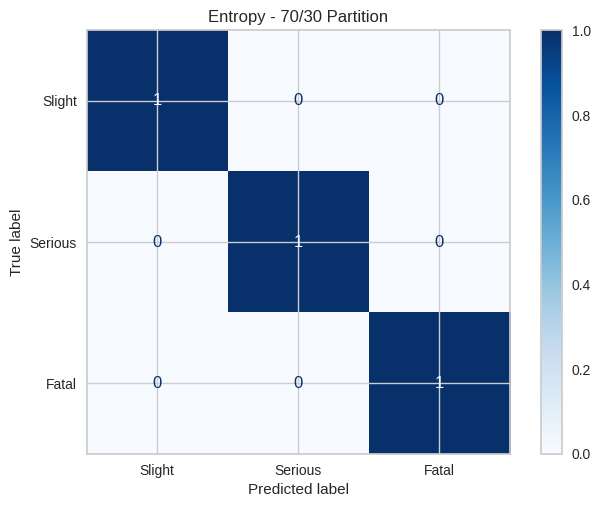


Gini Criterion:
[[ 33   0   0]
 [  0 123   0]
 [  0   0  84]]


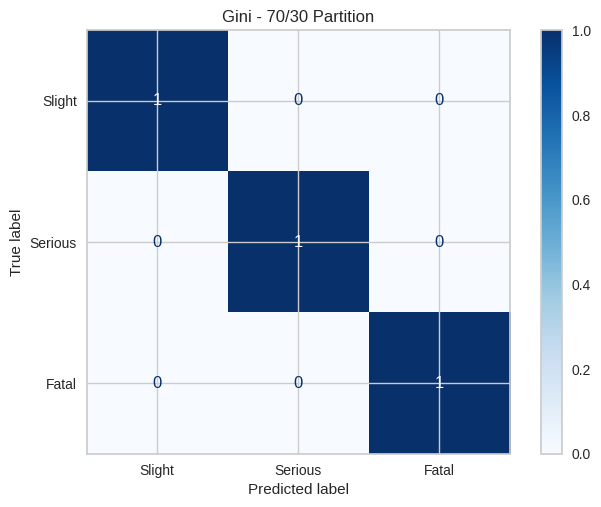


Partition 2 (60-40) Confusion Matrices:

Entropy Criterion:
[[ 40   0   0]
 [  0 176   0]
 [  0   0 104]]


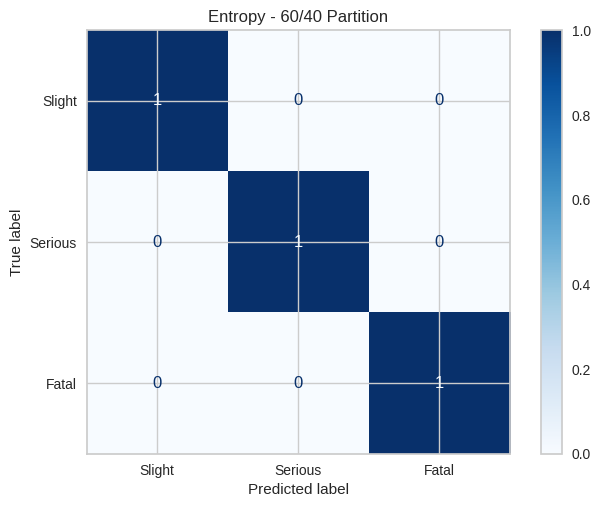


Gini Criterion:
[[ 40   0   0]
 [  0 176   0]
 [  0   0 104]]


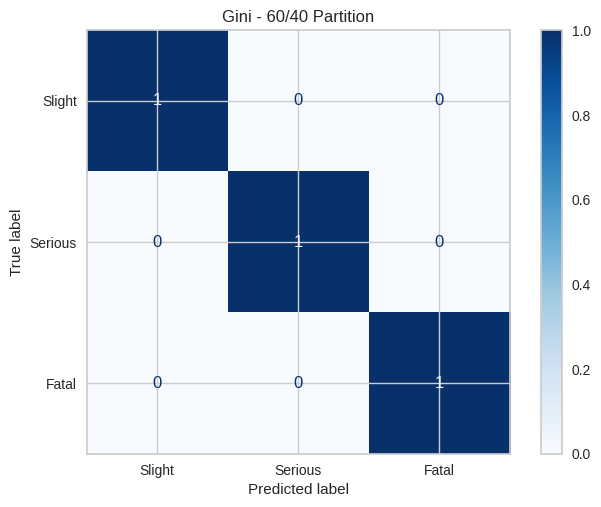


Partition 3 (80-20) Confusion Matrices:

Entropy Criterion:
[[19  0  0]
 [ 0 89  0]
 [ 0  0 52]]


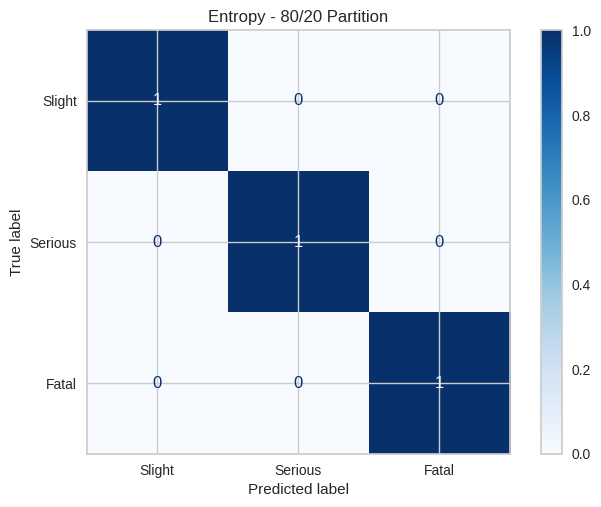


Gini Criterion:
[[19  0  0]
 [ 0 89  0]
 [ 0  0 52]]


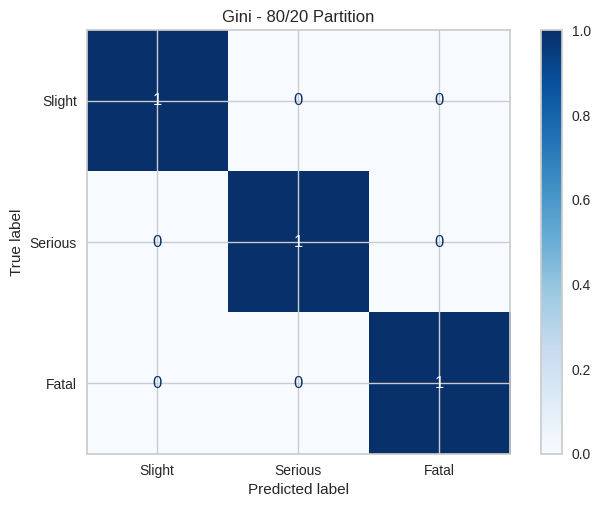

In [11]:
ClassNames = ['Slight','Serious','Fatal']

# Function to plot confusion matrix
def plot_confusion_matrix(clf, X_test, y_test, title):
    display = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        display_labels=ClassNames,
        cmap=plt.cm.Blues,
        normalize='true'
    )
    display.ax_.set_title(title)
    plt.show()

# Partition 1: 70% training and 30% test (Confusion Matrix)
# -------------------------------------------------------
print("\nPartition 1 (70-30) Confusion Matrices:")

# Entropy
print("\nEntropy Criterion:")
Confusion_Matrix_Entropy_PartitonOne = confusion_matrix(y_test1, clf_entropy1.predict(X_test1))
print(Confusion_Matrix_Entropy_PartitonOne)
plot_confusion_matrix(clf_entropy1, X_test1, y_test1, "Entropy - 70/30 Partition")

# Gini
print("\nGini Criterion:")
Confusion_Matrix_Gini_PartitonOne = confusion_matrix(y_test1, gini_clf1.predict(X_test1))
print(Confusion_Matrix_Gini_PartitonOne)
plot_confusion_matrix(gini_clf1, X_test1, y_test1, "Gini - 70/30 Partition")

# Partition 2: 60% training and 40% test (Confusion Matrix)
# -------------------------------------------------------
print("\nPartition 2 (60-40) Confusion Matrices:")

# Entropy
print("\nEntropy Criterion:")
Confusion_Matrix_Entropy_PartitonTwo = confusion_matrix(y_test2, clf_entropy2.predict(X_test2))
print(Confusion_Matrix_Entropy_PartitonTwo)
plot_confusion_matrix(clf_entropy2, X_test2, y_test2, "Entropy - 60/40 Partition")

# Gini
print("\nGini Criterion:")
Confusion_Matrix_Gini_PartitonTwo = confusion_matrix(y_test2, gini_clf2.predict(X_test2))
print(Confusion_Matrix_Gini_PartitonTwo)
plot_confusion_matrix(gini_clf2, X_test2, y_test2, "Gini - 60/40 Partition")

# Partition 3: 80% training and 20% test (Confusion Matrix)
# -------------------------------------------------------
print("\nPartition 3 (80-20) Confusion Matrices:")

# Entropy
print("\nEntropy Criterion:")
Confusion_Matrix_Entropy_PartitonThree = confusion_matrix(y_test3, clf_entropy3.predict(X_test3))
print(Confusion_Matrix_Entropy_PartitonThree)
plot_confusion_matrix(clf_entropy3, X_test3, y_test3, "Entropy - 80/20 Partition")

# Gini
print("\nGini Criterion:")
Confusion_Matrix_Gini_PartitonThree = confusion_matrix(y_test3, gini_clf3.predict(X_test3))
print(Confusion_Matrix_Gini_PartitonThree)
plot_confusion_matrix(gini_clf3, X_test3, y_test3, "Gini - 80/20 Partition")

In [12]:

from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(conf_matrix, model_name, partition_number):
    print(f"\nPerformance for {model_name} - Partition {partition_number}")
    accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
    print("Accuracy:", round(accuracy, 4))

    # Retrieve corresponding test and prediction sets
    if partition_number == 1:
        y_true = y_test1
        y_pred = clf_entropy1.predict(X_test1) if model_name == "Entropy" else gini_clf1.predict(X_test1)
    elif partition_number == 2:
        y_true = y_test2
        y_pred = clf_entropy2.predict(X_test2) if model_name == "Entropy" else gini_clf2.predict(X_test2)
    else:
        y_true = y_test3
        y_pred = clf_entropy3.predict(X_test3) if model_name == "Entropy" else gini_clf3.predict(X_test3)

    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_true, y_pred, average='macro'))


In [13]:
# First, let's make sure we have all the confusion matrices calculated correctly
# Using the correct variable names from your previous implementation

# Partition 1: 70% training and 30% test
Confusion_Matrix_Entropy_Partition1 = confusion_matrix(y_test1, clf_entropy1.predict(X_test1))
Confusion_Matrix_Gini_Partition1 = confusion_matrix(y_test1, gini_clf1.predict(X_test1))

# Partition 2: 60% training and 40% test
Confusion_Matrix_Entropy_Partition2 = confusion_matrix(y_test2, clf_entropy2.predict(X_test2))
Confusion_Matrix_Gini_Partition2 = confusion_matrix(y_test2, gini_clf2.predict(X_test2))

# Partition 3: 80% training and 20% test
Confusion_Matrix_Entropy_Partition3 = confusion_matrix(y_test3, clf_entropy3.predict(X_test3))
Confusion_Matrix_Gini_Partition3 = confusion_matrix(y_test3, gini_clf3.predict(X_test3))

# Now calculate metrics with the correct variable names
print("\n=== Performance Metrics ===")

# Partition 1
calculate_metrics(Confusion_Matrix_Entropy_Partition1, "Entropy", 1)
calculate_metrics(Confusion_Matrix_Gini_Partition1, "Gini", 1)

# Partition 2
calculate_metrics(Confusion_Matrix_Entropy_Partition2, "Entropy", 2)
calculate_metrics(Confusion_Matrix_Gini_Partition2, "Gini", 2)

# Partition 3
calculate_metrics(Confusion_Matrix_Entropy_Partition3, "Entropy", 3)
calculate_metrics(Confusion_Matrix_Gini_Partition3, "Gini", 3)


=== Performance Metrics ===

Performance for Entropy - Partition 1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Performance for Gini - Partition 1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Performance for Entropy - Partition 2
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Performance for Gini - Partition 2
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Performance for Entropy - Partition 3
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Performance for Gini - Partition 3
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


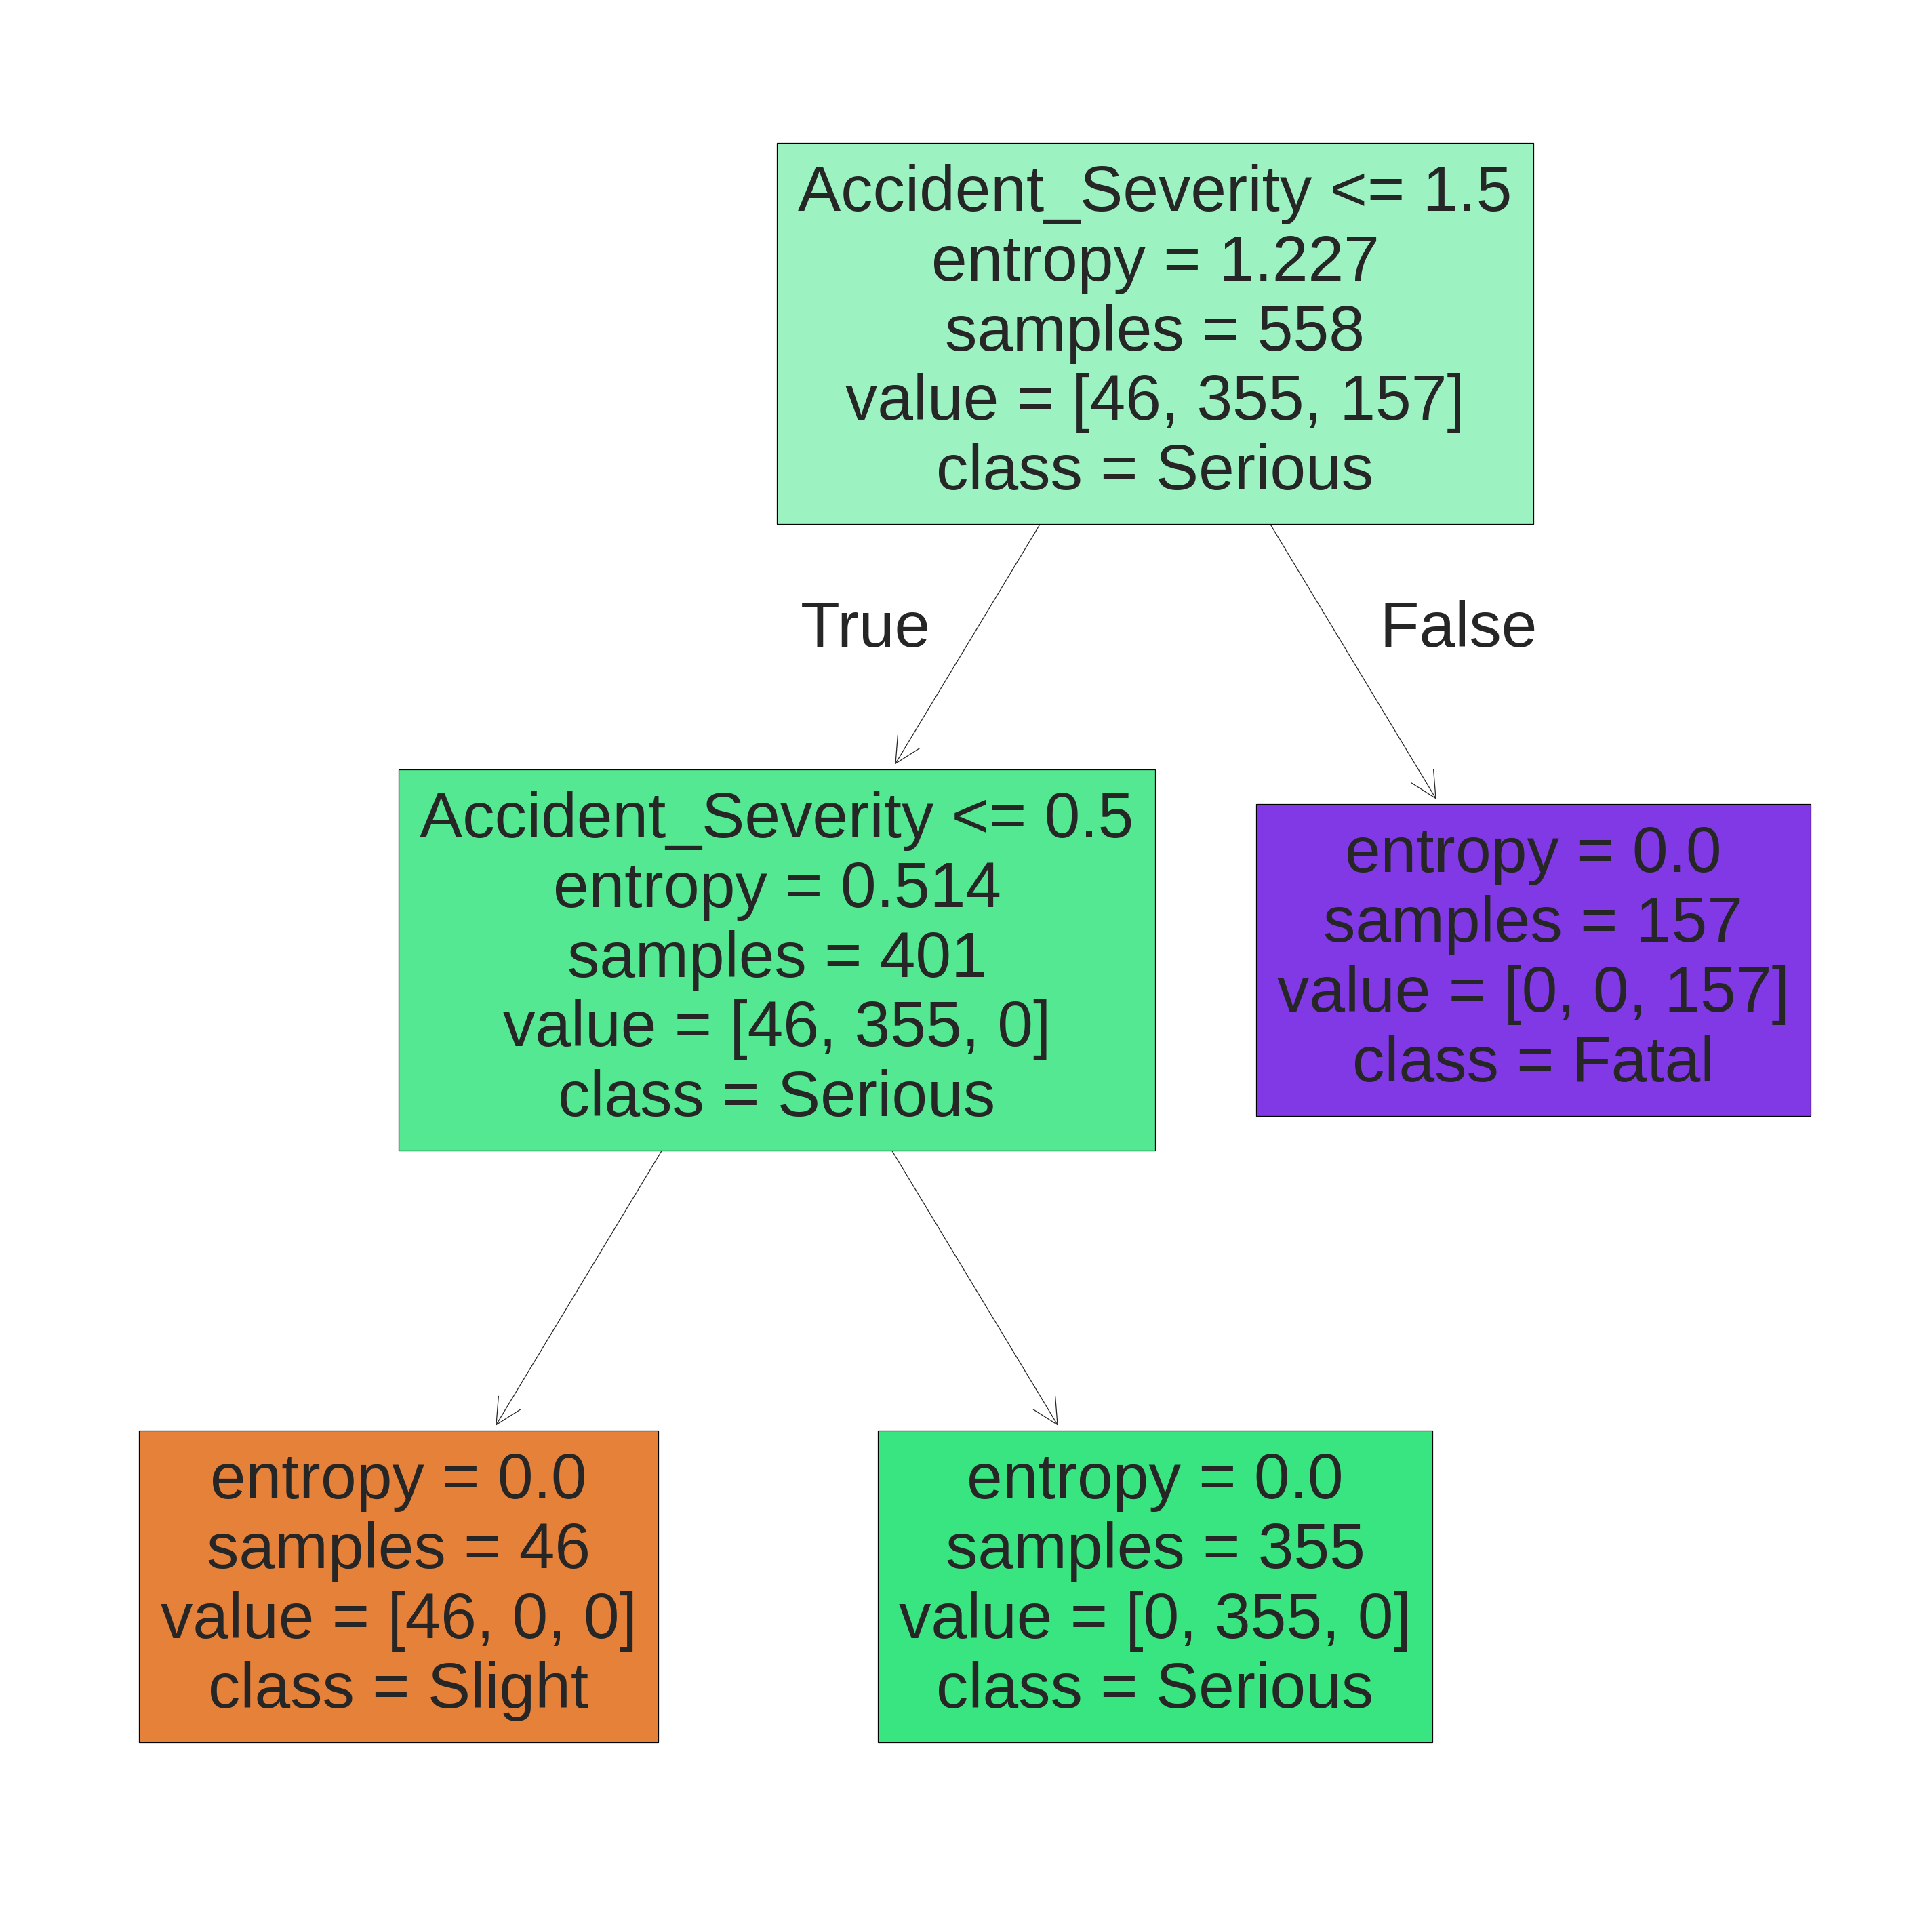

In [14]:
# Visualizing And Saving Decision Tree:

# First ensure we have the right classifiers for each partition
# (Using the variable names from your previous successful runs)

# Entropy - Partition 1
# Setting dpi = 300 to make image clearer than default
plt.figure(figsize=(12,12), dpi=300)
tree.plot_tree(clf_entropy1, feature_names=fn, class_names=ClassNames, filled=True)
plt.savefig("p1_entropy.png")

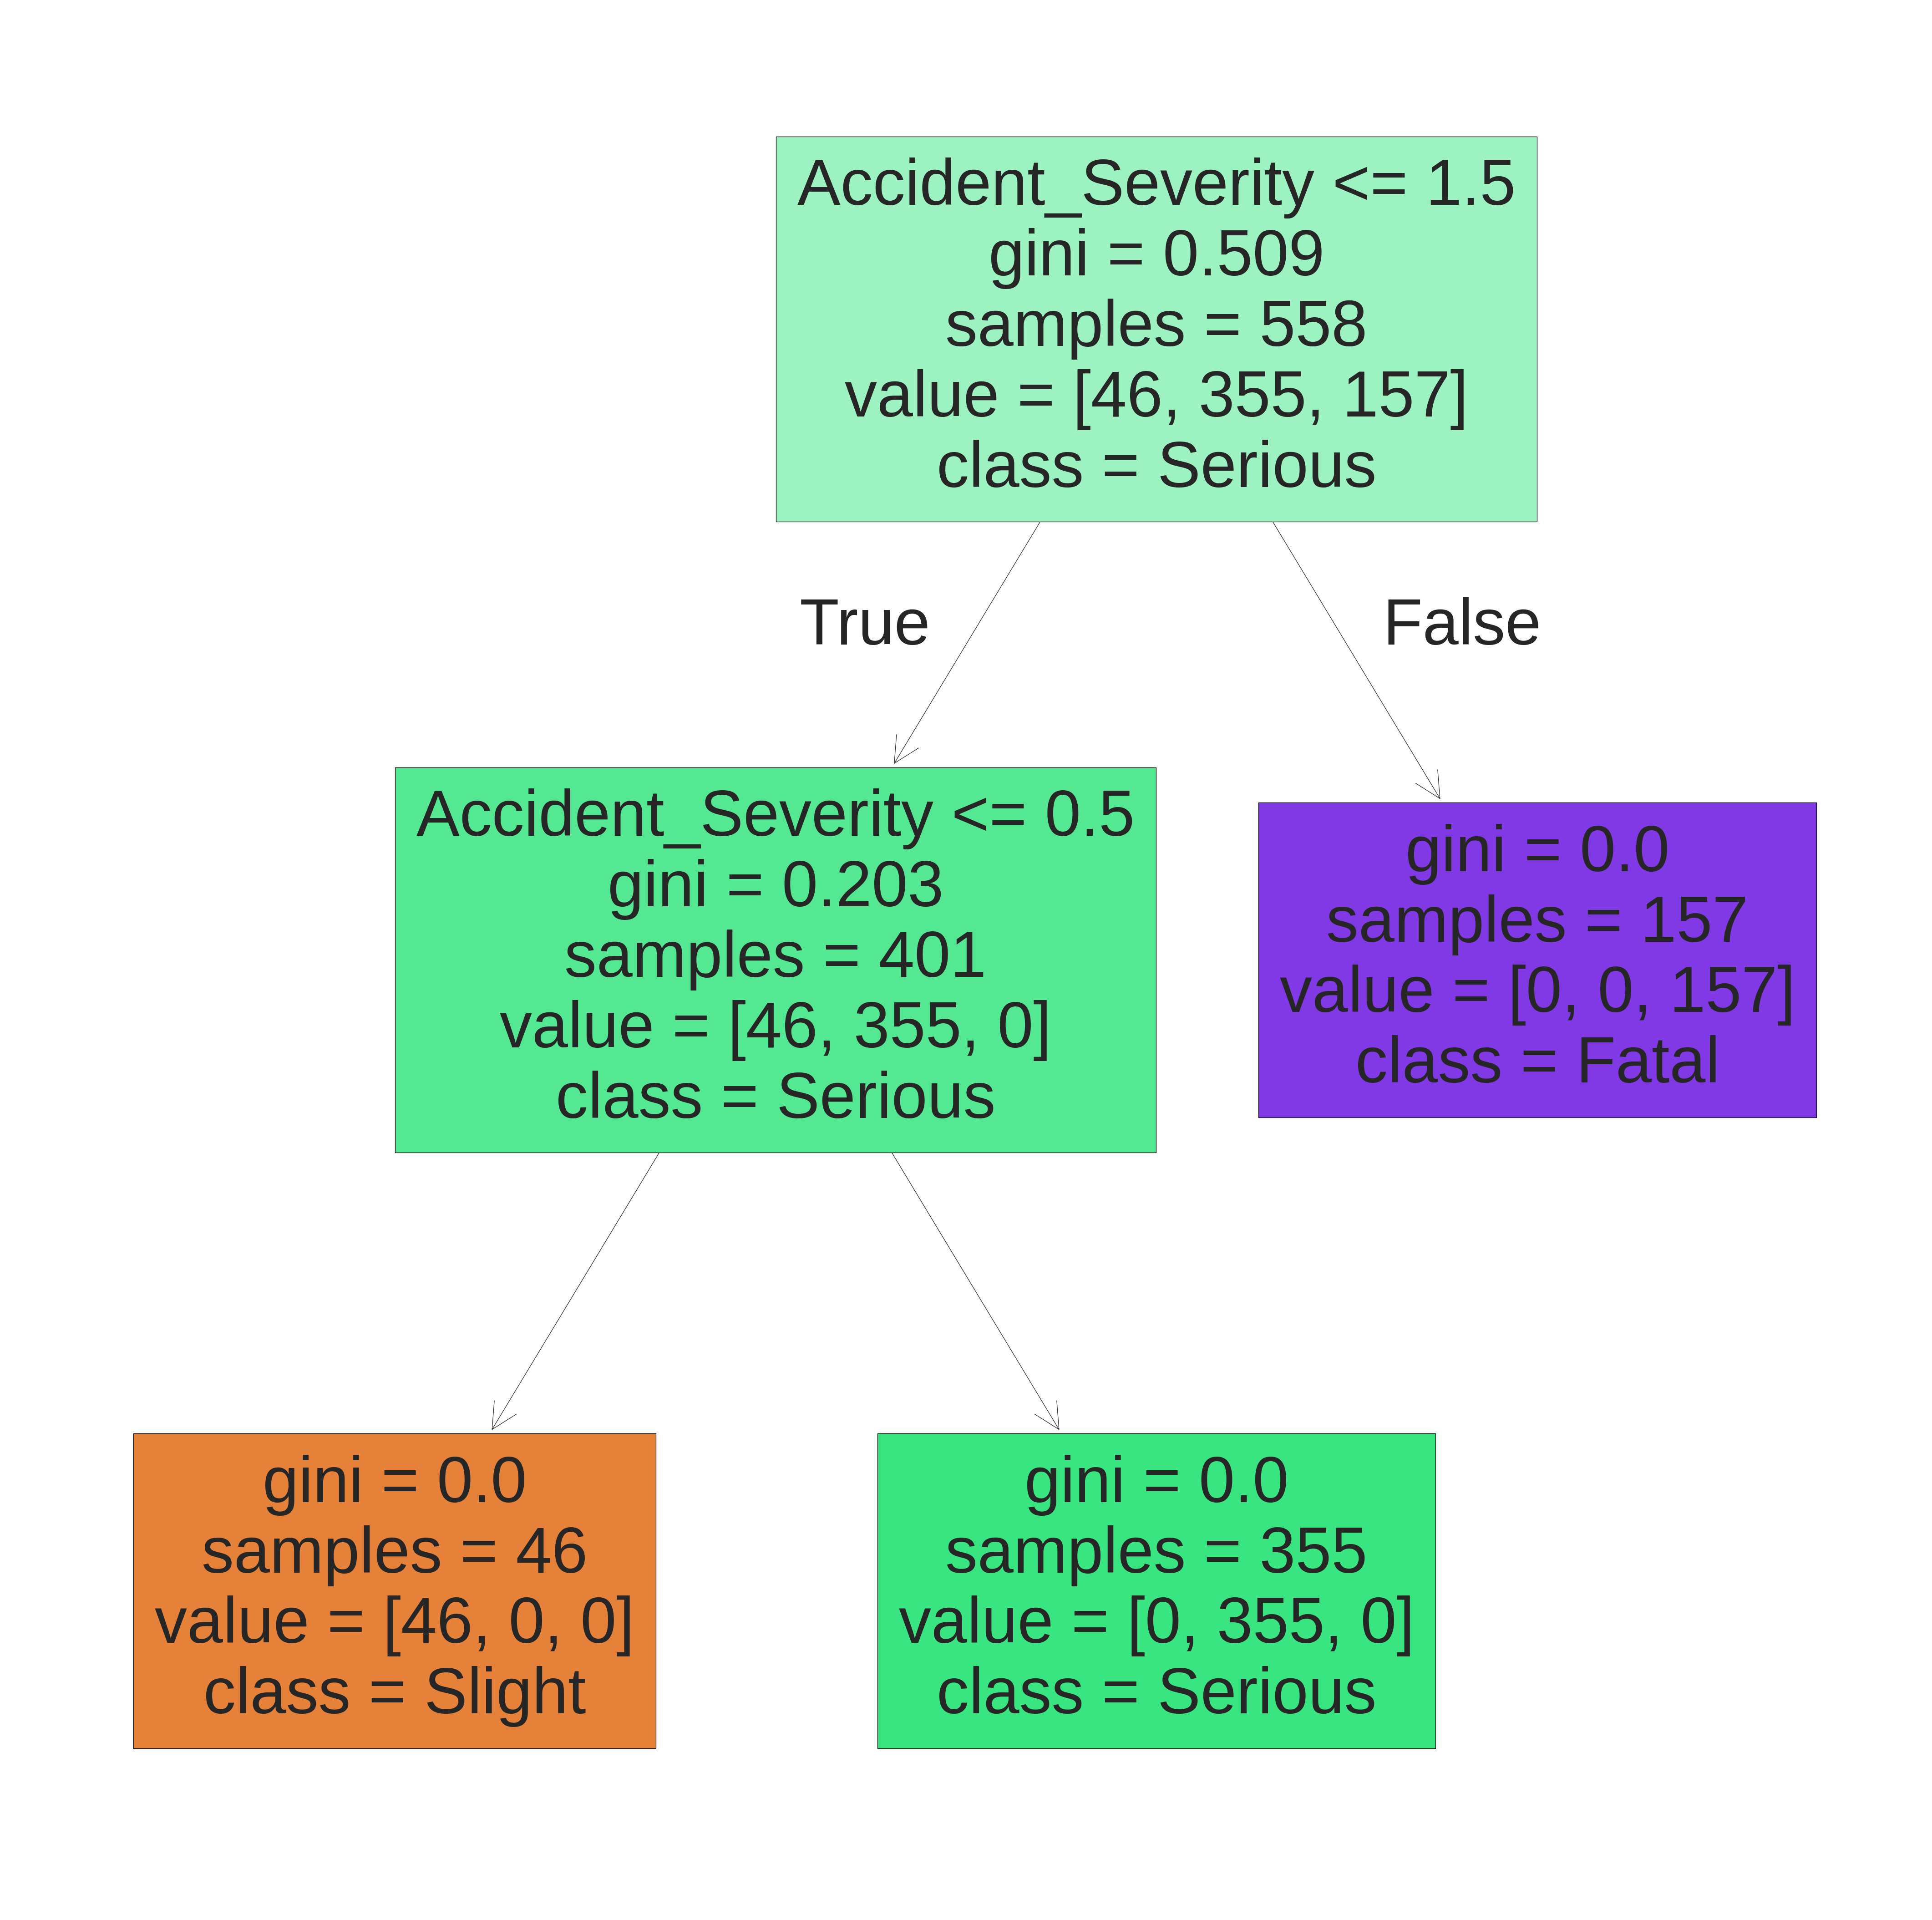

In [15]:

# Gini - Partition 1
# Setting dpi = 300 to make image clearer than default
plt.figure(figsize=(18,18), dpi=300)
tree.plot_tree(gini_clf1, feature_names=fn, class_names=ClassNames, filled=True)
plt.savefig("p1_gini.png")

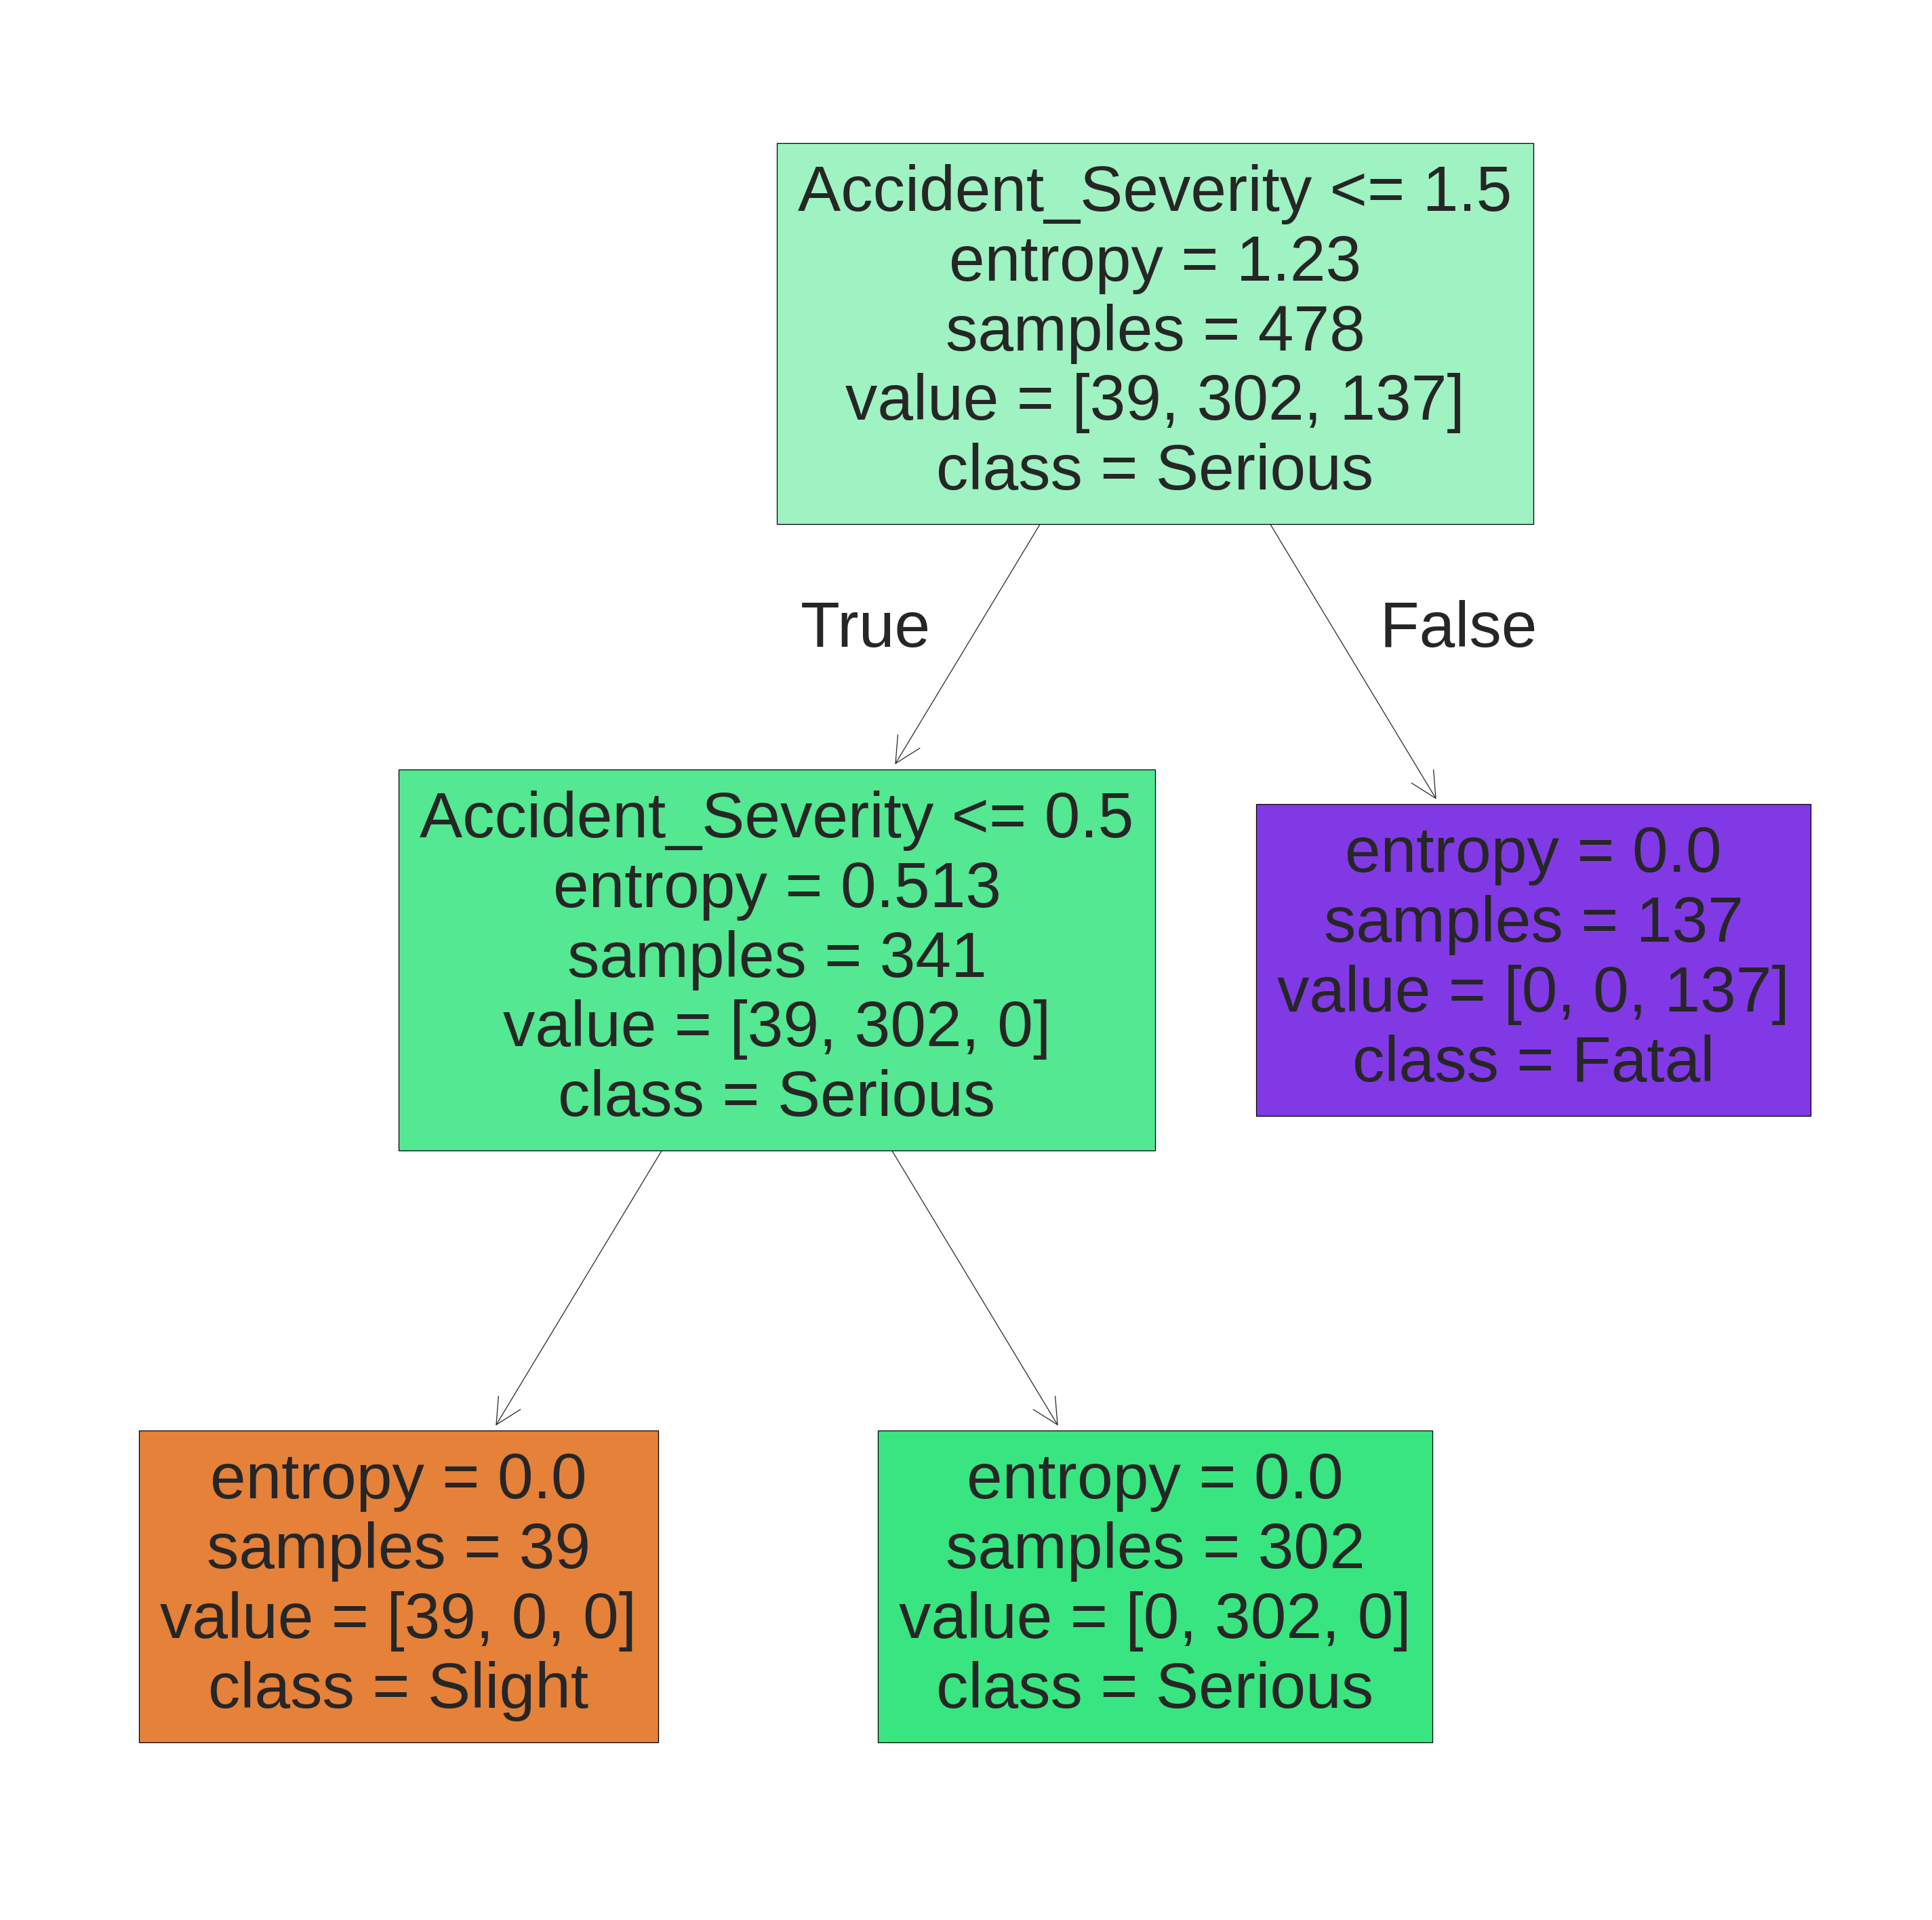

In [16]:

# Entropy - Partition 2
# Setting dpi = 300 to make image clearer than default
plt.figure(figsize=(12,12), dpi=300)
tree.plot_tree(clf_entropy2, feature_names=fn, class_names=ClassNames, filled=True)
plt.savefig("p2_entropy.png")

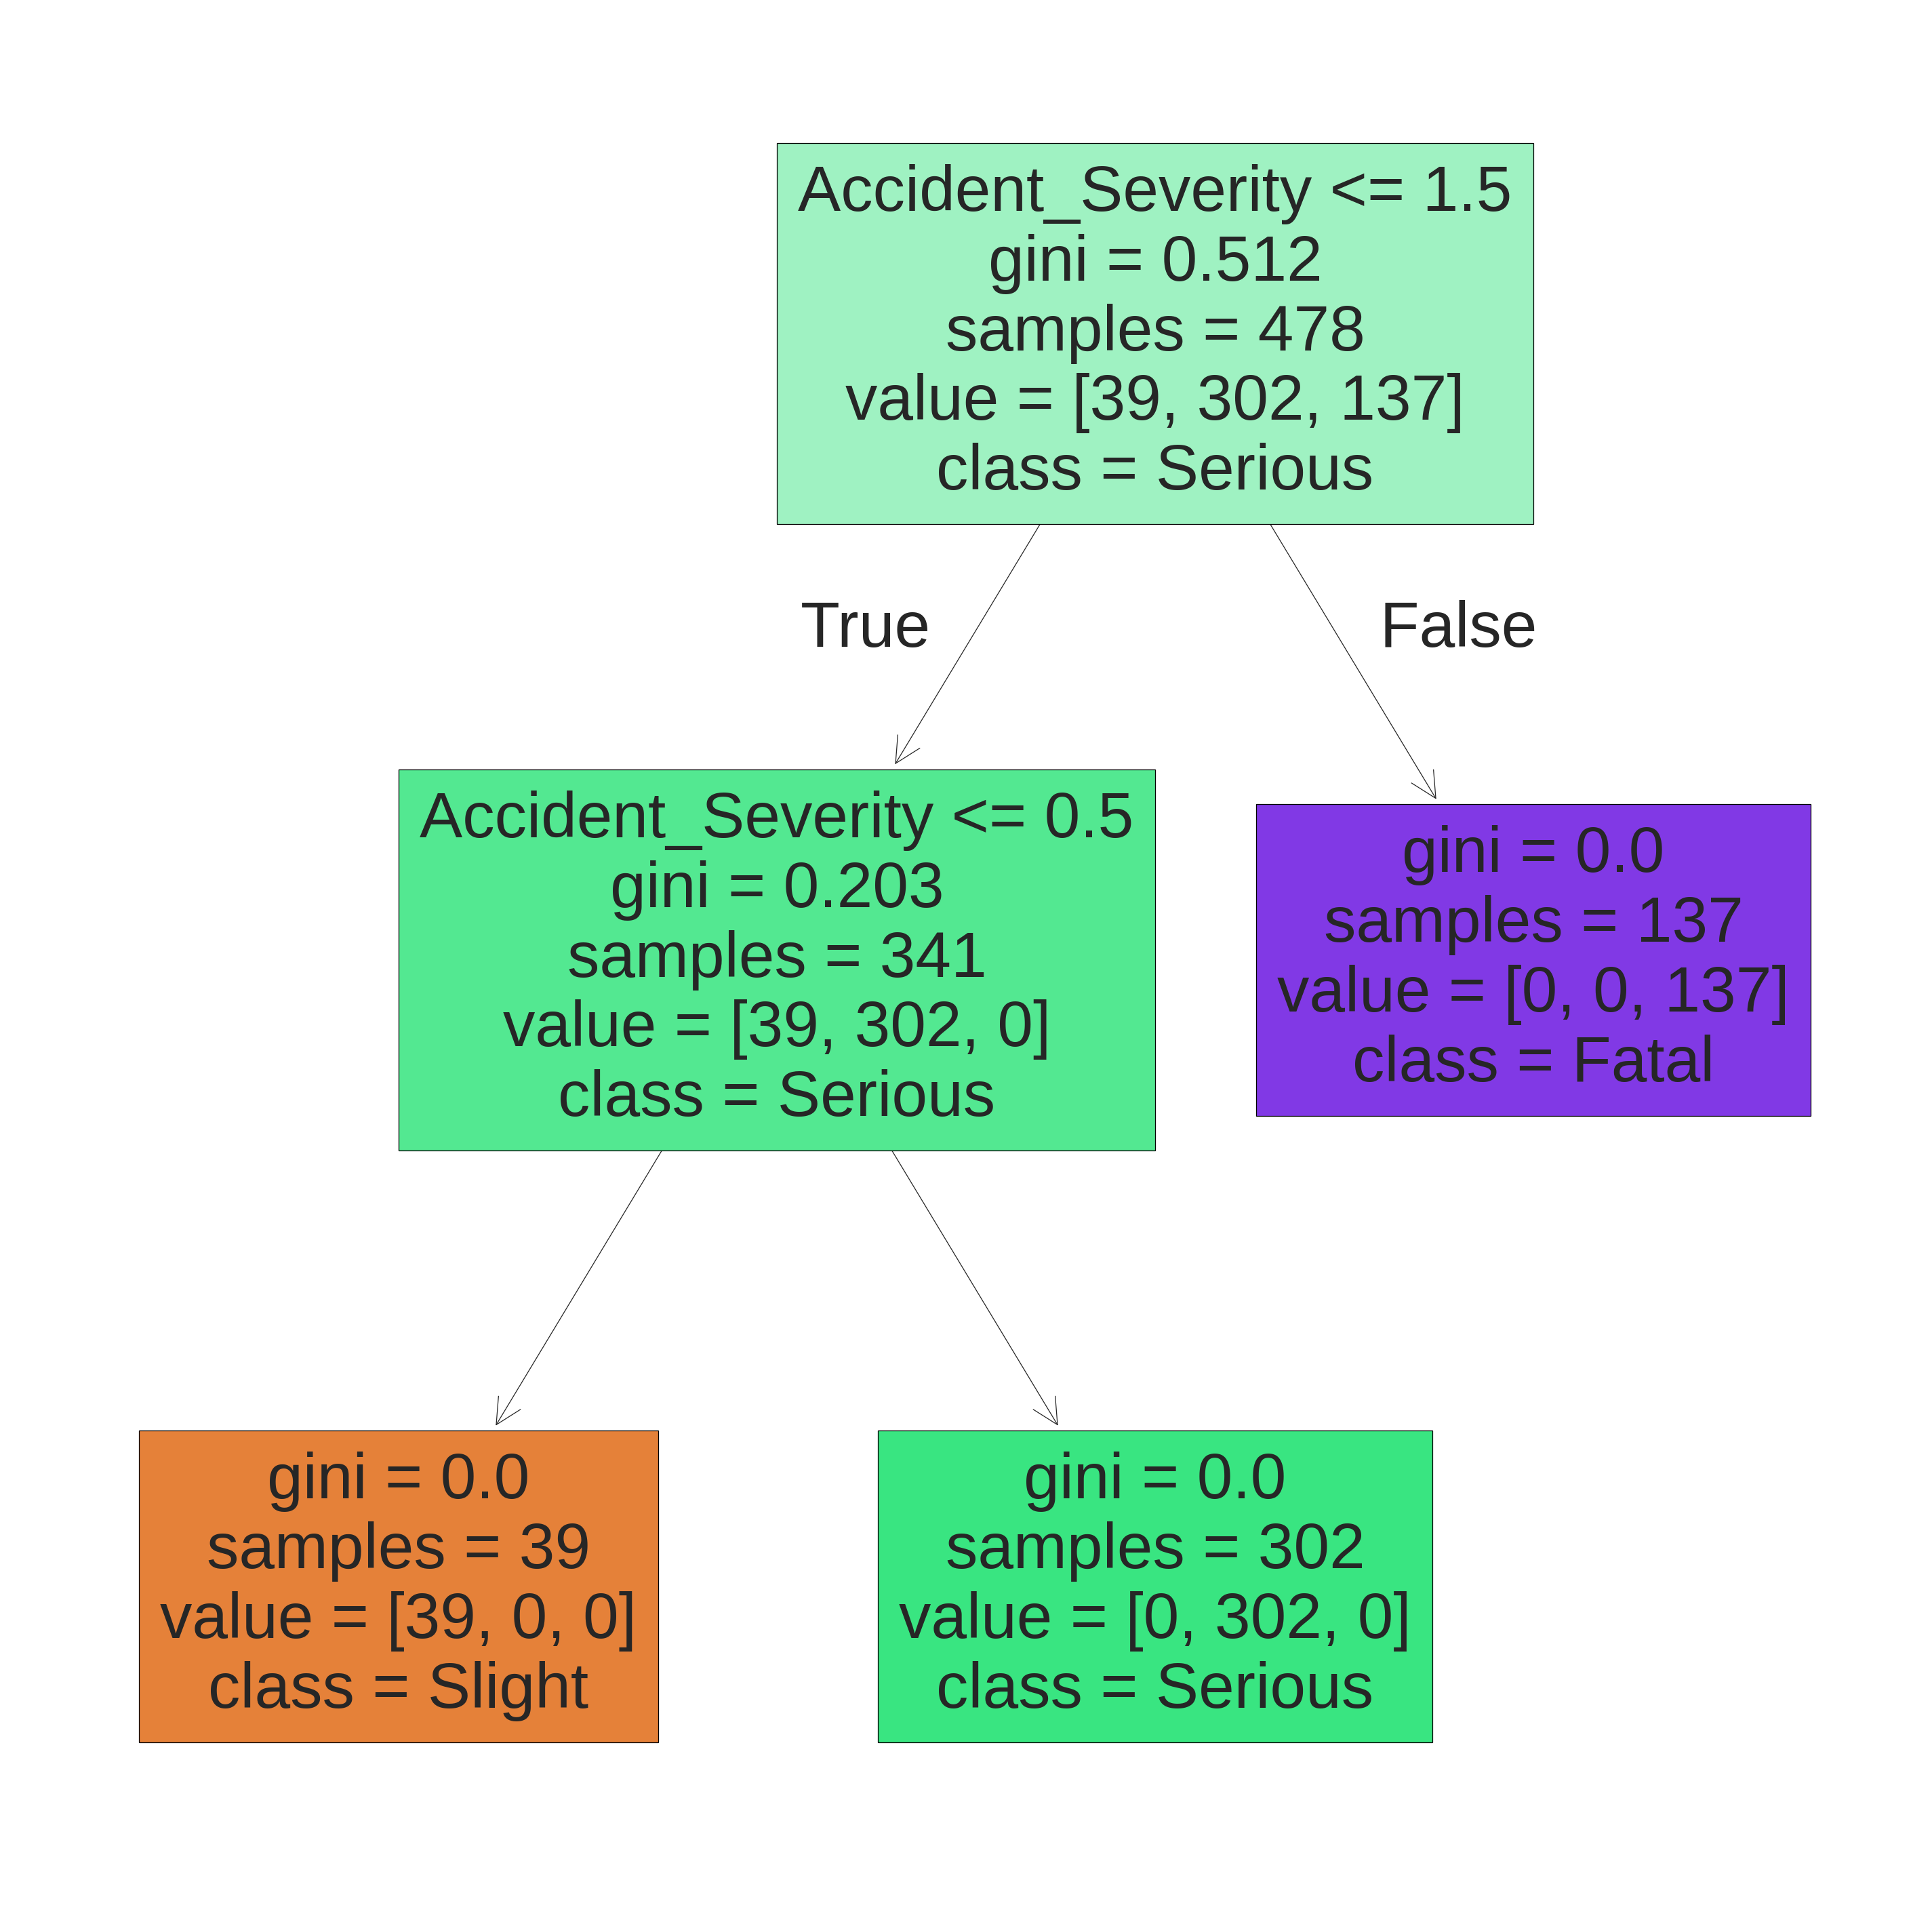

In [17]:

# Gini - Partition 2
# Setting dpi = 300 to make image clearer than default
plt.figure(figsize=(12,12), dpi=300)
tree.plot_tree(gini_clf2, feature_names=fn, class_names=ClassNames, filled=True)
plt.savefig("p2_gini.png")

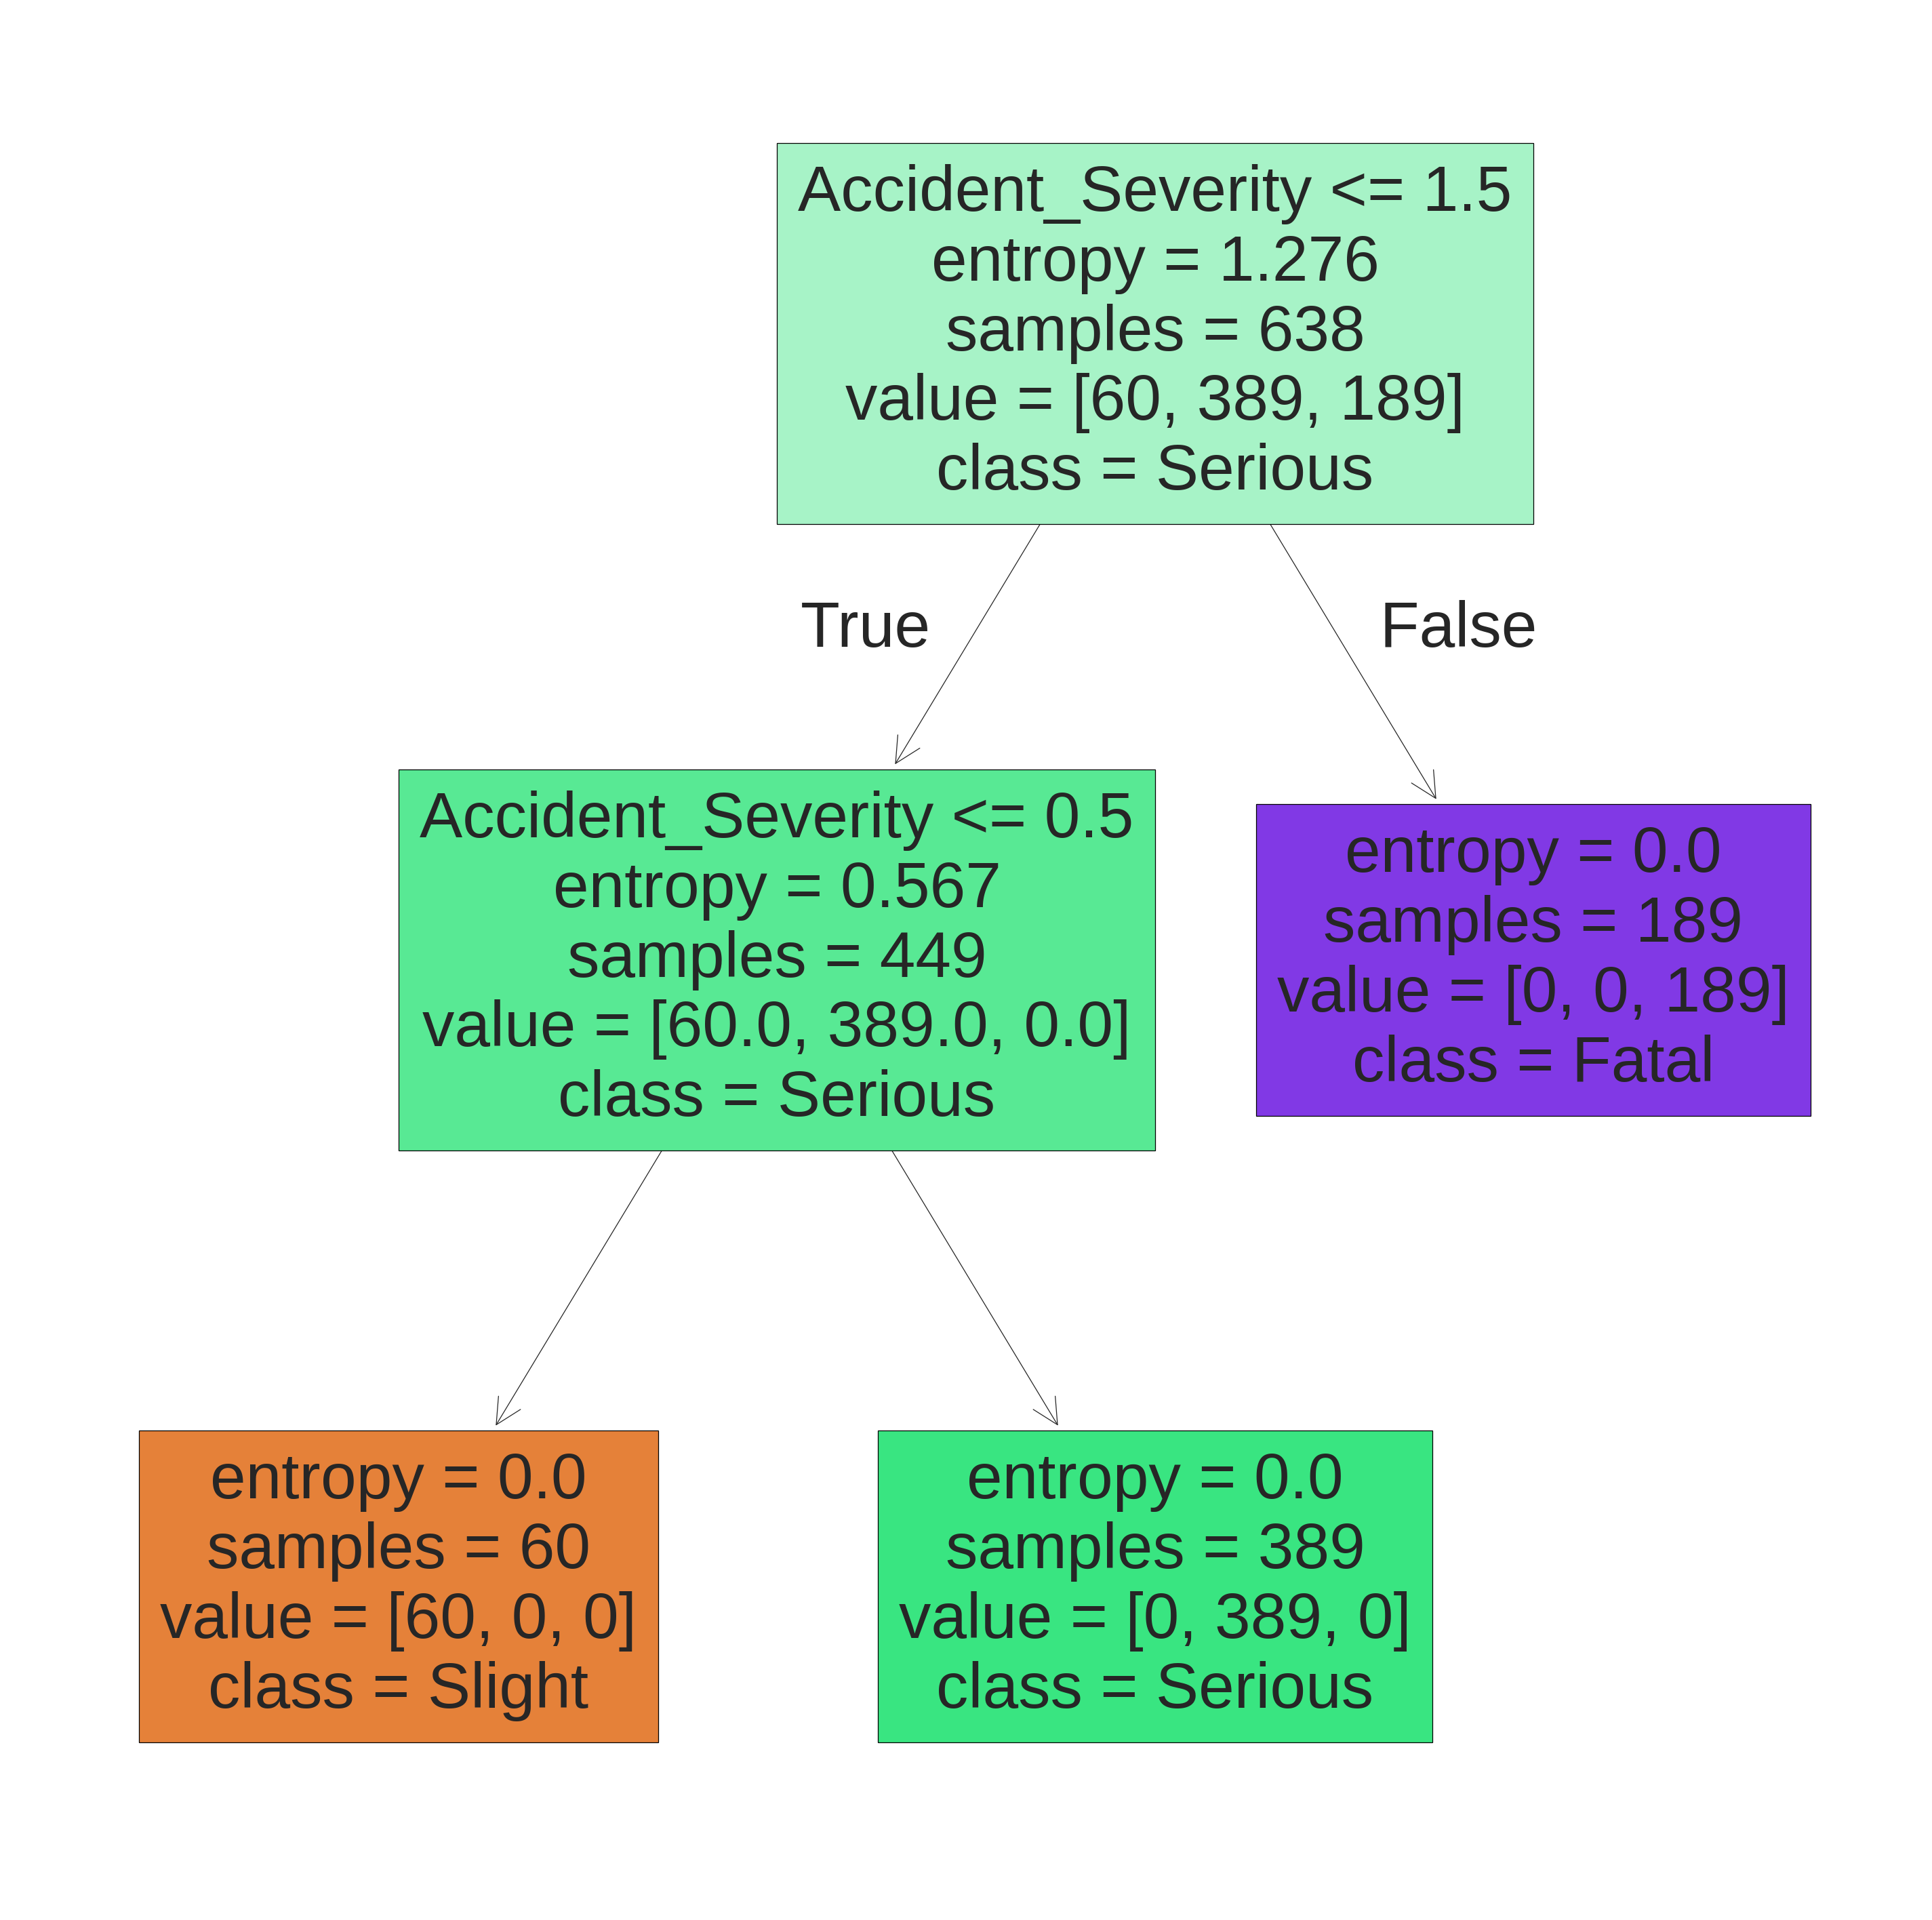

In [18]:
# Entropy - Partition 3
# Setting dpi = 300 to make image clearer than default
plt.figure(figsize=(12,12), dpi=300)
tree.plot_tree(clf_entropy3, feature_names=fn, class_names=ClassNames, filled=True)
plt.savefig("p3_entropy.png")

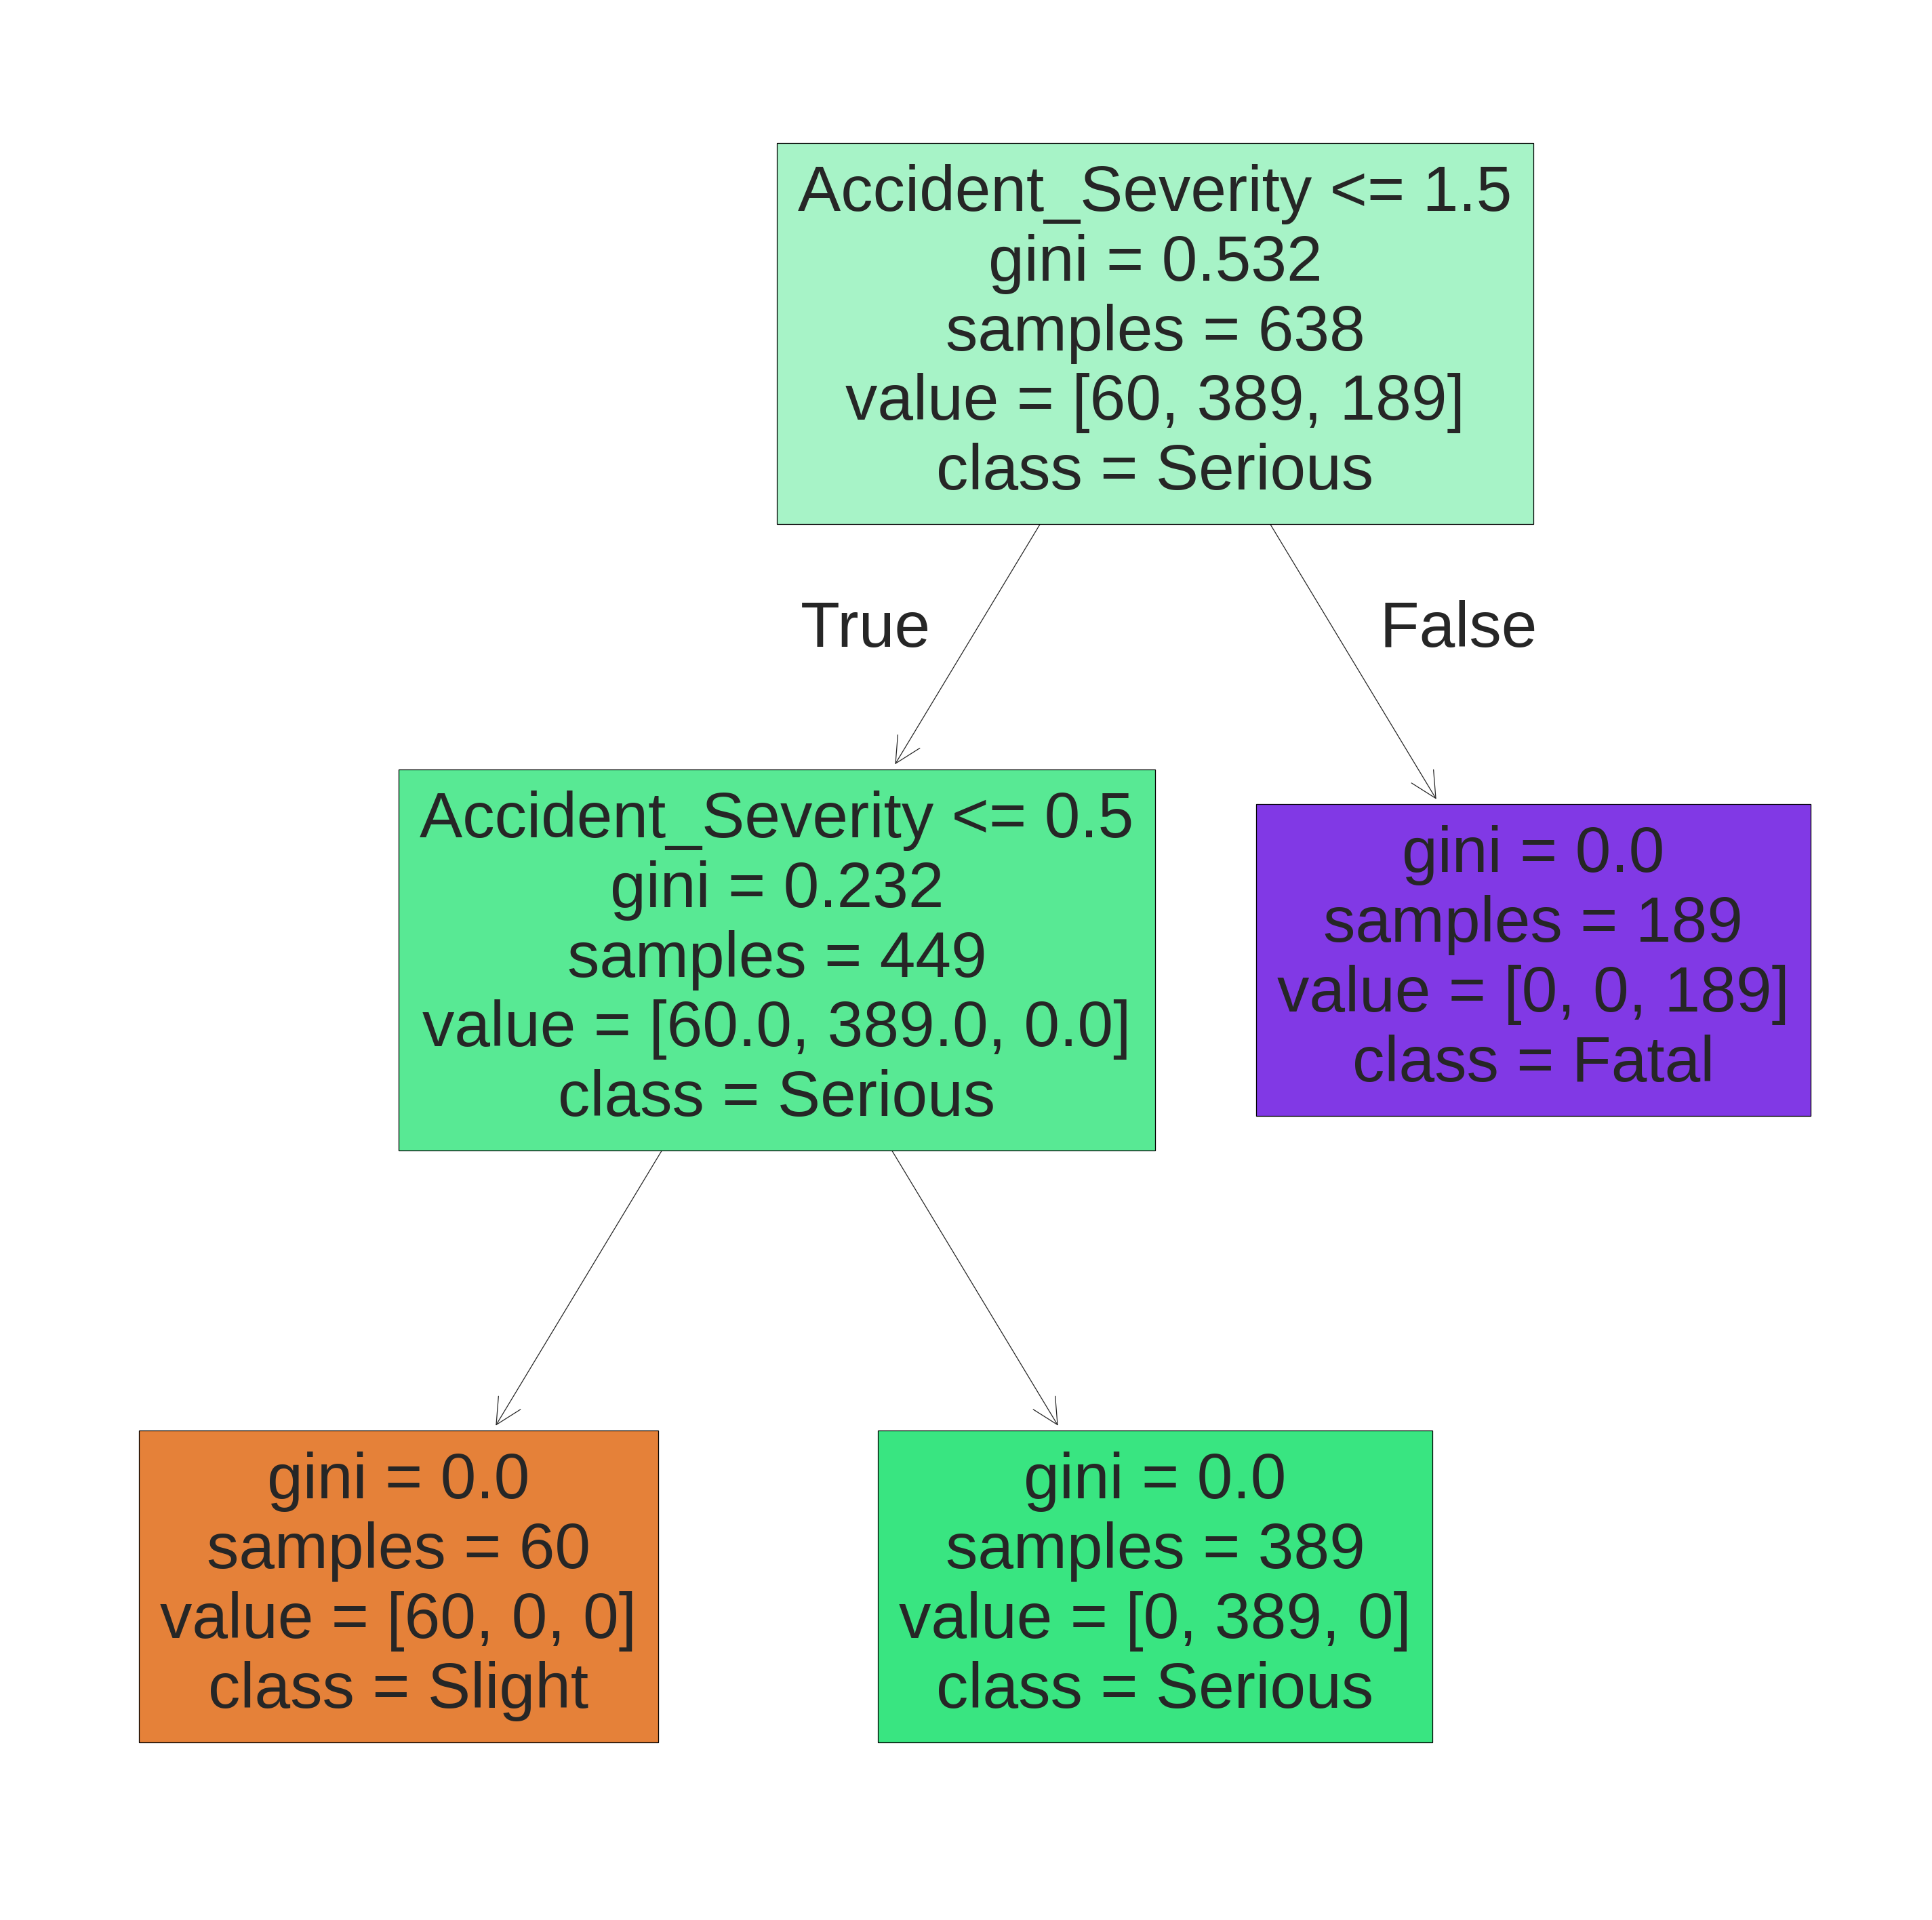

In [19]:
# Gini - Partition 3
# Setting dpi = 300 to make image clearer than default
plt.figure(figsize=(12,12), dpi=300)
tree.plot_tree(gini_clf3, feature_names=fn, class_names=ClassNames, filled=True)
plt.savefig("p3_gini.png")

In [20]:
# Generate a small sample dataset for accident prediction
sample_data = pd.DataFrame({
    'Weather': ['Clear', 'Rainy', 'Foggy', 'Clear', 'Rainy'],
    'Road_Type': ['Highway', 'City Road', 'Rural Road', 'Highway', 'City Road'],
    'Time_of_Day': ['Morning', 'Afternoon', 'Night', 'Evening', 'Morning'],
    'Traffic_Density': [1.2, 0.8, 1.5, 0.5, 1.0],
    'Speed_Limit': [60, 80, 100, 60, 80],
    'Number_of_Vehicles': [3, 2, 4, 1, 3],
    'Driver_Alcohol': [0, 0, 1, 0, 0],
    'Accident_Severity': ['Low', 'Moderate', 'High', 'Low', 'Moderate'],
    'Road_Condition': ['Dry', 'Wet', 'Icy', 'Dry', 'Wet'],
    'Vehicle_Type': ['Car', 'Truck', 'Motorcycle', 'Car', 'Bus'],
    'Driver_Age': [35, 42, 28, 45, 31],
    'Driver_Experience': [10, 15, 5, 20, 8],
    'Road_Light_Condition': ['Daylight', 'Artificial Light', 'Darkness', 'Daylight', 'Artificial Light'],
    'Accident': [0, 1, 1, 0, 0]
})

# Apply label encoding to all categorical columns
sample_data["Weather"] = encoder.fit_transform(sample_data["Weather"])
sample_data["Road_Type"] = encoder.fit_transform(sample_data["Road_Type"])
sample_data["Time_of_Day"] = encoder.fit_transform(sample_data["Time_of_Day"])
sample_data["Accident_Severity"] = encoder.fit_transform(sample_data["Accident_Severity"])
sample_data["Road_Condition"] = encoder.fit_transform(sample_data["Road_Condition"])
sample_data["Vehicle_Type"] = encoder.fit_transform(sample_data["Vehicle_Type"])
sample_data["Road_Light_Condition"] = encoder.fit_transform(sample_data["Road_Light_Condition"])

from sklearn.preprocessing import MinMaxScaler

# Columns to scale
columns_to_scale = ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles',
                    'Driver_Age', 'Driver_Experience']

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Perform Min-Max Scaling
sample_data[columns_to_scale] = scaler.fit_transform(sample_data[columns_to_scale])


In [21]:
# Save trained classifiers for accident prediction model

# Entropy classifiers
# --------------------------------------------------------
# Partition 1 - Entropy
partition_one_entropy = 'accident_partition_one_entropy.sav'
pickle.dump(clf_entropy1, open(partition_one_entropy, 'wb'))

# Partition 2 - Entropy
partition_Two_entropy = 'accident_partition_Two_entropy.sav'
pickle.dump(clf_entropy2, open(partition_Two_entropy, 'wb'))

# Partition 3 - Entropy
partition_Three_entropy = 'accident_partition_Three_entropy.sav'
pickle.dump(clf_entropy3, open(partition_Three_entropy, 'wb'))

# Gini classifiers
# --------------------------------------------------------
# Partition 1 - Gini
partition_one_Gini = 'accident_partition_one_Gini.sav'
pickle.dump(gini_clf1, open(partition_one_Gini, 'wb'))

# Partition 2 - Gini
partition_Two_Gini = 'accident_partition_Two_Gini.sav'
pickle.dump(gini_clf2, open(partition_Two_Gini, 'wb'))

# Partition 3 - Gini
partition_Three_Gini = 'accident_partition_Three_Gini.sav'
pickle.dump(gini_clf3, open(partition_Three_Gini, 'wb'))


In [22]:
# After loading model but before predicting:
loaded_model = pickle.load(open(partition_one_entropy, 'rb'))

# Get the expected feature names
expected_features = loaded_model.feature_names_in_



# b) Add missing columns (fill with 0 or appropriate value)
for col in expected_features:
    if col not in sample_data.columns:
        sample_data[col] = 0

# c) Reorder columns to match training
sample_data = sample_data[expected_features]

# Now predict
prediction = loaded_model.predict(sample_data)

import pickle

# ------------------- ENTROPY MODELS -------------------

# Partition 1 (Entropy)
print("Predict using model built on partition 1 (entropy)")
loaded_model = pickle.load(open(partition_one_entropy, 'rb'))
result = loaded_model.predict(X_PartitonOneTest)
print("Prediction for test dataset:", result)

prediction = loaded_model.predict(sample_data)
print("Prediction for new dataset:", prediction)

# Partition 2 (Entropy)
print("\nPredict using model built on partition 2 (entropy)")
loaded_model = pickle.load(open(partition_Two_entropy, 'rb'))
result = loaded_model.predict(X_PartitonTwoTest)
print("Prediction for test dataset:", result)

prediction = loaded_model.predict(sample_data)
print("Prediction for new dataset:", prediction)

# Partition 3 (Entropy)
print("\nPredict using model built on partition 3 (entropy)")
loaded_model = pickle.load(open(partition_Three_entropy, 'rb'))
result = loaded_model.predict(X_PartitonThreeTest)
print("Prediction for test dataset:", result)

prediction = loaded_model.predict(sample_data)
print("Prediction for new dataset:", prediction)


# ------------------- GINI MODELS -------------------

# Partition 1 (Gini)
print("\nPredict using model built on partition 1 (gini)")
loaded_model = pickle.load(open(partition_one_Gini, 'rb'))
result = loaded_model.predict(X_PartitonOneTest)
print("Prediction for test dataset:", result)

prediction = loaded_model.predict(sample_data)
print("Prediction for new dataset:", prediction)

# Partition 2 (Gini)
print("\nPredict using model built on partition 2 (gini)")
loaded_model = pickle.load(open(partition_Two_Gini, 'rb'))
result = loaded_model.predict(X_PartitonTwoTest)
print("Prediction for test dataset:", result)

prediction = loaded_model.predict(sample_data)
print("Prediction for new dataset:", prediction)

# Partition 3 (Gini)
print("\nPredict using model built on partition 3 (gini)")
loaded_model = pickle.load(open(partition_Three_Gini, 'rb'))
result = loaded_model.predict(X_PartitonThreeTest)
print("Prediction for test dataset:", result)

prediction = loaded_model.predict(sample_data)
print("Prediction for new dataset:", prediction)


Predict using model built on partition 1 (entropy)
Prediction for test dataset: [1 1 2 0 1 1 1 1 0 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 0 2 1
 2 2 1 1 0 1 1 2 0 1 1 2 1 1 1 2 1 2 1 0 1 1 2 0 1 1 1 1 0 2 2 2 1 2 1 2 1
 2 2 2 2 1 1 2 2 1 2 2 0 2 2 1 0 2 2 1 2 2 1 2 0 2 1 0 1 1 2 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 2 1 1 2 1 1 0 2 1 1 2 1 2 2 2 1 2 2 2 0 1 2 2 2 1 0 2 2 1 0
 1 1 1 1 2 1 1 0 0 2 1 1 0 0 2 0 2 2 1 0 2 1 2 2 2 2 1 1 2 2 1 1 1 1 2 1 1
 2 1 1 1 2 2 2 2 0 1 1 2 2 1 1 1 1 1 2 1 1 2 2 0 0 1 0 1 0 2 1 0 1 2 1 2 0
 2 1 1 0 2 2 1 2 2 1 2 2 0 1 0 2 1 1]
Prediction for new dataset: [1 2 0 1 2]

Predict using model built on partition 2 (entropy)
Prediction for test dataset: [1 1 2 0 1 1 1 1 0 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 1 1 0 2 1
 2 2 1 1 0 1 1 2 0 1 1 2 1 1 1 2 1 2 1 0 1 1 2 0 1 1 1 1 0 2 2 2 1 2 1 2 1
 2 2 2 2 1 1 2 2 1 2 2 0 2 2 1 0 2 2 1 2 2 1 2 0 2 1 0 1 1 2 1 1 1 1 1 1 1
 2 1 1 1 1 1 1 2 1 1 2 1 1 0 2 1 1 2 1 2 2 2 1 2 2 2 0 1 2 2 2 1 0 2 2 1 0
 1 1 1 1 2 